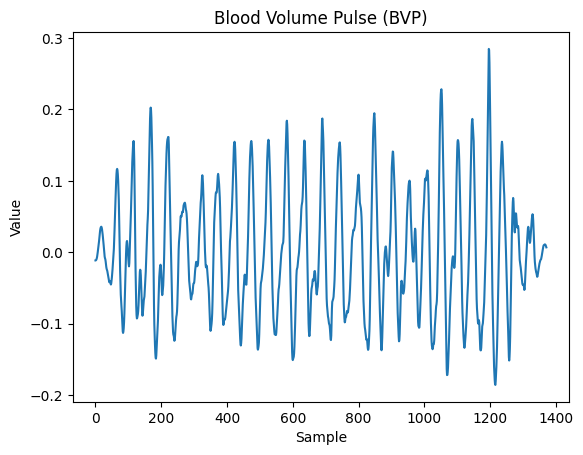

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load file
data = np.load("pos_output.npy")

# Plot
plt.plot(data)
plt.title("Blood Volume Pulse (BVP)")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.show()

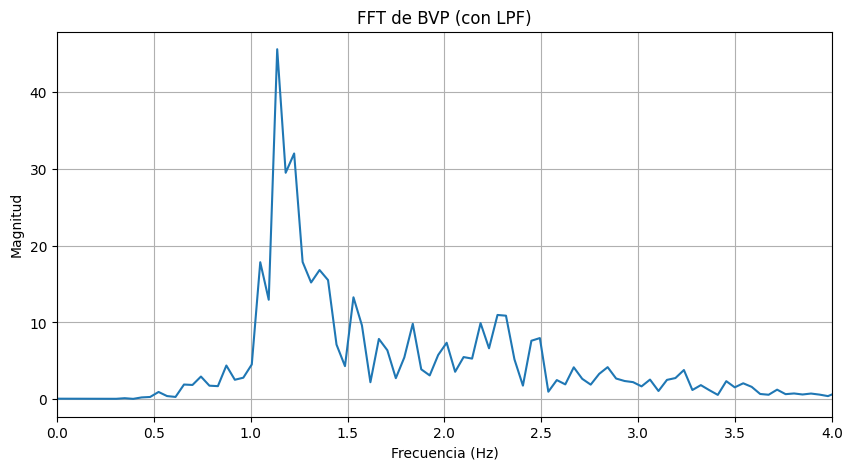

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

fs = 60
cutoff = 4

bvp = data

def lowpass(signal, fs, cutoff):
    b, a = butter(
        N=4,
        Wn=cutoff / (fs / 2),
        btype='low'
    )
    return filtfilt(b, a, signal)

bvp_lpf = lowpass(bvp, fs, cutoff)

N = len(bvp_lpf)
fft_vals = np.fft.rfft(bvp_lpf)
fft_freqs = np.fft.rfftfreq(N, d=1/fs)
fft_power = np.abs(fft_vals)

plt.figure(figsize=(10,5))
plt.plot(fft_freqs, fft_power)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("FFT de BVP (con LPF)")
plt.xlim(0, 4)
plt.grid(True)
plt.show()


In [6]:
peak_freq = fft_freqs[np.argmax(fft_power)]
hr_fft = peak_freq * 60
print("HR estimada por FFT:", hr_fft, "bpm")

HR estimada por FFT: 68.22157434402332 bpm
